In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

#sample test cases
points = [
    #test case1
    # (20, 4), (9, 8), (5, 10), (4, 4), (2, 0), (18, 21)
    #test case2
    # (2, 3), (12, 30), (40, 50), (5, 1), (12, 10), (3, 4)
    #test case3
    (-2,3), (3,2), (5,6), (7,8), (-5,-2), (-7,-6), (4,5), (6,3)
    ]

Closest pair:
Point1: (4, 5), Point2: (5, 6)
Distance between point1 and point2: 1.4142135623730951


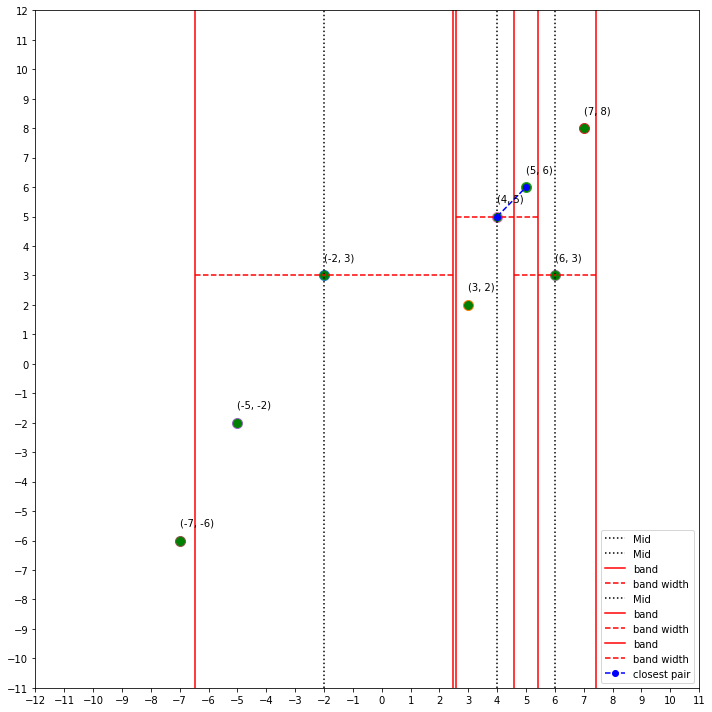

In [3]:


plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True

def distPoints(p1, p2):

    # calculating and returning distance between two points using the distance formulae

    return math.sqrt((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2)


def bruteForceClosest(points):
    p1 = None
    p2 = None
    min_dist = float('inf')

    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            distance = distPoints(points[i], points[j])
            if distance < min_dist:
                min_dist = distance
                p1 = points[i]
                p2 = points[j]

    return (p1, p2, min_dist)


def closestPairRec(SortX, SortY):
    numPoints = len(SortX)

    if numPoints <= 3:

        # if there are only 3 or less than three points then use brute force to find closest pair

        return bruteForceClosest(SortX)

    else:

        # calculating mid point on X axis

        mid = SortX[numPoints // 2]
        plt.axvline(x=mid[0], color ='black', linestyle=":", label='Mid')
        # points on the left side of midpoint

        leftMidX = SortX[:numPoints // 2]

        # point on the right side of the midpoint

        rightMidX = SortX[numPoints // 2:]

        leftMidY = []
        rightMidY = []

        # for sorting Y values, we check the corresponding x value
        # if it is smaller than mid then append to left else append to right

        for point in SortY:
            if point[0] <= mid[0]:
                leftMidY.append(point)
            else:
                rightMidY.append(point)

        # recursively finding the closest pair on the left and the right side

        (p1Left, p2Left, distLeft) = closestPairRec(leftMidX, leftMidY)
        (p1Right, p2Right, distRight) = closestPairRec(rightMidX,
                rightMidY)

        # Find the minimum distance between the left and the right closest pair distances
        # Assign the points and the distance to point1, point2 and distance

        point1 = None
        point2 = None
        minDist = None
        if distLeft < distRight:
            point1 = p1Left
            point2 = p2Left
            minDist = distLeft
        else:
            point1 = p1Right
            point2 = p2Right
            minDist = distRight

        

        plt.axvline(x=mid[0]- minDist, color='red', label='band')

        plt.plot([mid[0] - minDist, mid[0]], [mid[1], mid[1]], 'red', linestyle="--", label='band width')

        plt.axvline(x=mid[0]+ minDist, color='red')

        plt.plot([mid[0] + minDist, mid[0]], [mid[1], mid[1]], 'red', linestyle="--")

        #append every point inside the band to the insideBand array
        insideBand = []
        for point in SortY:
            if mid[0] - minDist < point[0] < mid[0] + minDist:
                insideBand.append(point)

        '''for every point in insideBand check distance with the next 6 points and compare
        it with minDist'''
        for i in range(len(insideBand)):
            for j in range(i + 1, min(i + 7, len(insideBand))):
                d = distPoints(insideBand[i], insideBand[j])
                if d < minDist:
                    point1 = insideBand[i]
                    point2 = insideBand[j]
                    minDist = d

        return (point1, point2, minDist)


def closest(points):


    # Sorting the points on X value
    # Sorted function has complexity of O(nLogn)

    SortX = sorted(points, key=lambda point: point[0])

    # Sorting the points on Y value

    SortY = sorted(points, key=lambda point: point[1])

   

    for point in points:
        plt.plot(point[0], point[1], marker='o', markerfacecolor='green', markersize=10)

    plt.axis([SortX[0][0], SortX[-1][0], SortY[0][1], SortY[-1][1]])

    for i, j in points:
        plt.text(i, j+0.5, '({}, {})'.format(i, j))

    #set x-axis ticks (step size=2)
    plt.xticks(np.arange(SortX[0][0]-5, SortX[-1][0]+5, 1))

    #set y-axis ticks (step size=5)
    plt.yticks(np.arange(SortY[0][1]-5, SortY[-1][1]+5, 1))

    # Calling the recursive function
    point1, point2, minDist = closestPairRec(SortX, SortY)
    print("Closest pair:\nPoint1: {0}, Point2: {1}\nDistance between point1 and point2: {2}".format(point1, point2, minDist))

    plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'bo', linestyle="--", label='closest pair')

    leg = plt.legend(loc='lower right')
    plt.show()

closest(points)